In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
import math
df = pd.read_csv('3D_spatial_network.txt', header = None)
df=df.drop(columns=[0])
df[1] = (df[1] - df[1].mean())/df[1].std()
df[2] = (df[2] - df[2].mean())/df[2].std()
df[3] = (df[3] - df[3].mean())/df[3].std()

n =len(df)

training_size = int(0.7 * n)
testing_size = int(0.3 * n)
training_size+=(n-(training_size+testing_size))

x1 = df.iloc[0:training_size, 0]
x2 = df.iloc[0:training_size, 1]
y = df.iloc[0:training_size, 2]

x1_test = df.iloc[training_size:n, 0]
x2_test = df.iloc[training_size:n, 1]
y_test = df.iloc[training_size:n, 2]

In [6]:
e=[]
e2=[]
lambdaa= [0.0001,0.001,0.01,0.1,0.25,0.5, 1, 2]
w0=0;w1=0;w2=0;nu=0.01;stop=100

# def ridge_reg():
for i in lambdaa:
    for j in range(stop):
        y_predicted= w0 + w1*x1 + w2*x2
#         e.append(math.sqrt( (1/(2*training_size)) * sum((y- y_predicted) ** 2 ) + i*(w0**2 + w1**2 + w2**2) ))
        D_w0 = (-1/training_size) * sum(y - y_predicted) + 2*i*w0
        D_w1 = (-1/training_size) * sum(x1 * (y - y_predicted)) + 2*i*w1
        D_w2 = (-1/training_size) * sum(x2 * (y - y_predicted)) + 2*i*w2
        w0 = w0 - (nu * D_w0)
        w1 = w1 - (nu * D_w1)
        w2 = w2 - (nu * D_w2)
    def rms(w0,w1,w2):
        y_predicted_test= w0 + w1*x1_test + w2*x2_test
        rmse=math.sqrt( (1/(2*testing_size)) * sum((y_test - y_predicted_test) ** 2 ) + i*(w0**2 + w1**2 + w2**2) )
        r2=1-(sum(y_test - y_predicted_test) ** 2 )/(sum(y_test - y.mean()) ** 2 )
        return rmse,r2
    e.append(rms(w0,w1,w2)[0])
    e2.append(rms(w0,w1,w2)[1])
# iteration_list=[i for i in range(1,lambda)]
    
# ridge_reg()

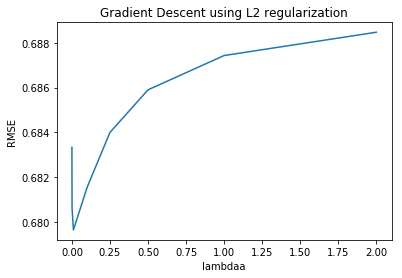

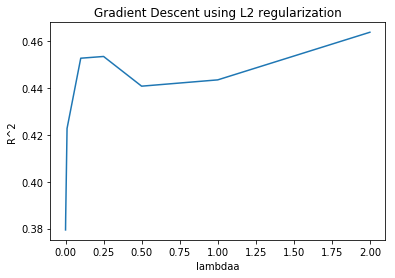

w0= -0.0053988944757876155 ,w1= 0.203056693605774 ,w2= -1.3741027375266173
lambdaa= 0.0001   RMSE and R^2= 0.6833419219513607 0.3794564244343085
lambdaa= 0.001   RMSE and R^2= 0.6806346683103581 0.38469853079883753
lambdaa= 0.01   RMSE and R^2= 0.6796571615669597 0.4227243472815866
lambdaa= 0.1   RMSE and R^2= 0.681556068225261 0.45268841433039464
lambdaa= 0.25   RMSE and R^2= 0.6840020729197253 0.45343138605207345
lambdaa= 0.5   RMSE and R^2= 0.6859011808332394 0.4407626566028351
lambdaa= 1   RMSE and R^2= 0.6874295058238635 0.44344858553378974
lambdaa= 2   RMSE and R^2= 0.6884681330126238 0.46376420101633586


In [15]:
plt.plot(lambdaa,e[:8])
plt.xlabel('lambdaa')
plt.ylabel('RMSE')
plt.title('Gradient Descent using L2 regularization') 
plt.show()
plt.plot(lambdaa,e2[:8])
plt.xlabel('lambdaa')
plt.ylabel('R^2')
plt.title('Gradient Descent using L2 regularization') 
plt.show()
print ("w0=",w0,",w1=",w1,",w2=",w2)
for i in range(0,8):
    print ("lambdaa=",lambdaa[i],"  RMSE and R^2=",e[i],e2[i])

In [10]:
e3=[]
e4=[]
lambdaa= [0.0001,0.001,0.01,0.1,0.25,0.5, 1, 2]
w0=0;w1=0;w2=0;nu=0.01;stop=100

# def ridge_reg():
for i in lambdaa:
    for j in range(stop):
        y_predicted= w0 + w1*x1 + w2*x2
#         e.append(math.sqrt( (1/(2*training_size)) * sum((y- y_predicted) ** 2 ) + i*(w0**2 + w1**2 + w2**2) ))
        D_w0 = (-1/training_size) * sum(y - y_predicted) + i*abs(w0)
        D_w1 = (-1/training_size) * sum(x1 * (y - y_predicted)) + i*abs(w1)
        D_w2 = (-1/training_size) * sum(x2 * (y - y_predicted)) + i*abs(w2)
        w0 = w0 - (nu * D_w0)
        w1 = w1 - (nu * D_w1)
        w2 = w2 - (nu * D_w2)
    def rms(w0,w1,w2):
        y_predicted_test= w0 + w1*x1_test + w2*x2_test
        rmse=math.sqrt( (1/(2*testing_size)) * sum((y_test - y_predicted_test) ** 2 ) + i*(abs(w0) + abs(w1) + abs(w2) ) )
        r2=1-(sum(y_test - y_predicted_test) ** 2 )/(sum(y_test - y.mean()) ** 2 )
        return rmse,r2
    e3.append(rms(w0,w1,w2)[0])
    e4.append(rms(w0,w1,w2)[1])
# iteration_list=[i for i in range(1,lambda)]
    
# ridge_reg()

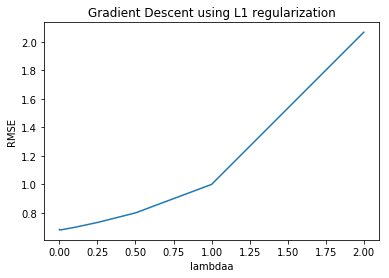

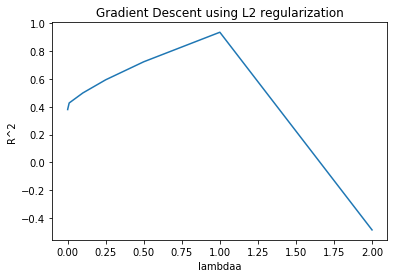

w0= -0.0053988944757876155 ,w1= 0.203056693605774 ,w2= -1.3741027375266173
lambdaa= 0.0001   RMSE and R^2= 0.6833495999009589 0.3794642672183943
lambdaa= 0.001   RMSE and R^2= 0.680754998282542 0.3849499306419012
lambdaa= 0.01   RMSE and R^2= 0.6811462210670898 0.4265971871399291
lambdaa= 0.1   RMSE and R^2= 0.6988352015747838 0.4986074237771766
lambdaa= 0.25   RMSE and R^2= 0.7330309082589864 0.5929627577767956
lambdaa= 0.5   RMSE and R^2= 0.8002450164517664 0.7222592527432898
lambdaa= 1   RMSE and R^2= 1.0001852927655006 0.9340797166883773
lambdaa= 2   RMSE and R^2= 2.06803322821683 -0.4841618546757489


In [14]:
plt.plot(lambdaa,e3[:8])
plt.xlabel('lambdaa')
plt.ylabel('RMSE')
plt.title('Gradient Descent using L1 regularization') 
plt.show()
plt.plot(lambdaa,e4[:8])
plt.xlabel('lambdaa')
plt.ylabel('R^2')
plt.title('Gradient Descent using L2 regularization') 
plt.show()
print ("w0=",w0,",w1=",w1,",w2=",w2)
for i in range(0,8):
    print ("lambdaa=",lambdaa[i],"  RMSE and R^2=",e3[i],e4[i])